In [2]:
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
slc = Table.read('../data/KIC5217733_slc.fits.txt')
llc = Table.read('../data/KIC5217733_llc.fits.txt')
slc = slc[slc['SAP_QUALITY'] == 0]
llc = llc[llc['SAP_QUALITY'] == 0]

In [4]:
llc_trim_idx = np.where(np.logical_and(llc['TIME']>=np.min(slc['TIME']), llc['TIME']<=np.max(slc['TIME'])))
llc_trim = llc[llc_trim_idx]
slc_tess = slc[::2]

#Same times, and short cadence down-graded to every 2 min instead of minute

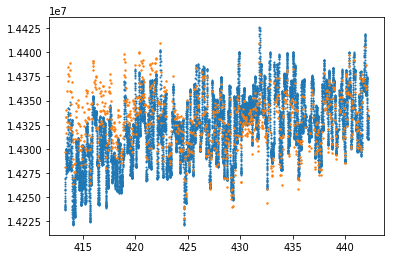

In [8]:
plt.scatter(slc_tess['TIME'],slc_tess['PDCSAP_FLUX'],s=1)
plt.scatter(llc_trim['TIME'],llc_trim['PDCSAP_FLUX'],s=2)

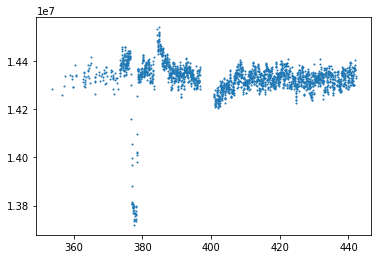

In [7]:
plt.scatter(llc['TIME'],llc['PDCSAP_FLUX'],s=1)

In [10]:
from astropy.stats import LombScargle

stime = slc_tess['TIME'].data
sflux = slc_tess['PDCSAP_FLUX'].data
serr = slc_tess['PDCSAP_FLUX_ERR'].data

stime_f = stime[~np.isnan(sflux)]
sflux_f = sflux[~np.isnan(sflux)]
serr_f = serr[~np.isnan(sflux)]

ltime = llc_trim['TIME'].data
lflux = llc_trim['PDCSAP_FLUX'].data
lerr = llc_trim['PDCSAP_FLUX_ERR'].data

ltime_f = ltime[~np.isnan(lflux)]
lflux_f = lflux[~np.isnan(lflux)]
lerr_f = lerr[~np.isnan(lflux)]

slc_out = np.hstack([stime_f[:,np.newaxis],sflux_f[:,np.newaxis],serr_f[:,np.newaxis]])
llc_out = np.hstack([ltime_f[:,np.newaxis],lflux_f[:,np.newaxis],lerr_f[:,np.newaxis]])

frequency = np.linspace(1.0/(np.max(stime_f)-np.min(stime_f)),1.0/np.min(np.diff(stime_f)),1000)
slc_power = LombScargle(stime_f, sflux_f, serr_f).power(frequency)
llc_power = LombScargle(ltime_f, lflux_f, lerr_f).power(frequency)

np.savetxt('KIC_5217733_slc_filtered.csv',slc_out,delimiter=',')
np.savetxt('KIC_5217733_llc_filtered.csv',llc_out,delimiter=',')

In [11]:
smin_t = np.min(np.diff(stime_f))
smax_t = np.max(stime_f)-np.min(stime_f)

lmin_t = np.min(np.diff(ltime_f))
lmax_t = np.max(ltime_f)-np.min(ltime_f)

sfs = np.linspace(1.0/smax_t,1.0/smin_t,100000)
lfs = np.linspace(1.0/lmax_t,1.0/lmin_t,10000)

slc_power = LombScargle(stime_f, sflux_f).power(sfs)
llc_power = LombScargle(ltime_f, lflux_f).power(lfs)

(0, 7)

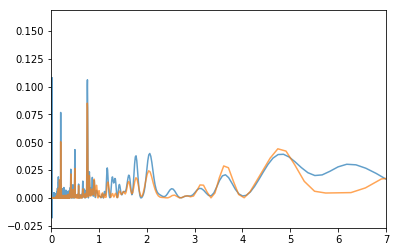

In [14]:
plt.plot(1.0/lfs, llc_power, alpha=0.7)
plt.plot(1.0/sfs, slc_power, alpha=0.7)
plt.xlim(lmin_t,lmax_t)
plt.xlim(0,7)

In [100]:
(1.0/)*24*60

28.799999999999997

(0.0001, 0.1)

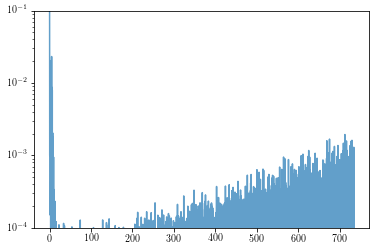

In [107]:
plt.plot(sfs, slc_power, alpha=0.7)
plt.yscale('log')
plt.ylim(1e-4,1e-1)

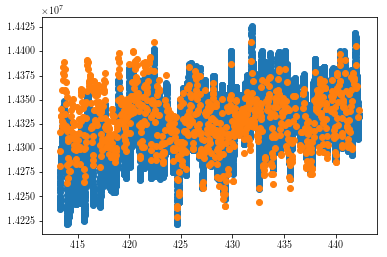

In [98]:
plt.scatter(stime_f,sflux_f)
plt.scatter(ltime_f,lflux_f)